In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [2]:
df=pd.read_csv('advertising.csv')
df

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


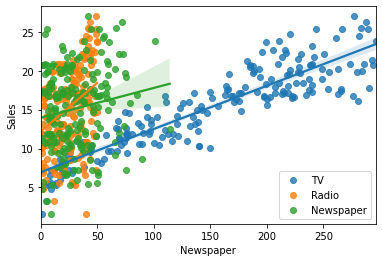

In [3]:
sns.regplot(data=df,x='TV',y='Sales',label='TV')
sns.regplot(data=df,x='Radio',y='Sales',label='Radio')
sns.regplot(data=df,x='Newspaper',y='Sales',label='Newspaper')
plt.legend()
plt.show()

In [4]:
x=df.drop(columns=['Sales'])
y=df.loc[:,['Sales']]

In [5]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=2,test_size=0.3)
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [6]:
y_pred=lr.predict(x_test)


In [7]:

print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))

0.8669425938331328
3.4226840769420135


In [8]:
# check x_train
x_new=[[150,69,73]]
y=df.loc[:,['Sales']]

In [9]:
y_new=lr.predict(x_new)
print(y_new)

[[20.34138011]]


In [10]:
# now use polynomial futures
from sklearn.preprocessing import PolynomialFeatures

In [11]:
poly=PolynomialFeatures(degree=1)
x_train=poly.fit_transform(x_train)


In [12]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [13]:
x_new=[[150,69,73]]
x_new=poly.fit_transform(x_new)
y_new=lr.predict(x_new)
print(y_new)

[[20.34138011]]


# Machine learning (classification)-ch-6

In [14]:
# categorycle data
# yes or no ans
# KNN model

#knn= k nearest neighbors
# how to select K Kmax=no.rows**0.5
# knn-c max value
# knn-r avg of outputs

glass=pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [15]:
x=glass.drop(columns=['Type'])
y=glass['Type']

In [16]:
# use scale for classification log
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scale=scaler.fit_transform(x)



In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
knn=KNeighborsClassifier(n_neighbors=3)


In [19]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_scale,y,test_size=0.3,random_state=10)
knn.fit(x_train,y_train)


KNeighborsClassifier(n_neighbors=3)

In [20]:
y_pred=knn.predict(x_test)
for i,j in zip(y_test,y_pred):
    print(i," ",j)

3   2
2   2
2   5
3   1
1   1
2   1
1   2
5   5
1   1
3   1
1   1
2   1
1   2
7   7
1   2
2   2
6   7
3   1
1   3
2   2
1   2
2   2
6   2
2   2
2   2
5   2
2   2
1   2
1   3
5   5
1   1
1   1
2   2
2   2
1   1
7   7
1   2
7   7
2   1
7   1
1   2
1   2
1   1
1   2
1   2
1   1
1   2
1   1
2   1
7   2
2   2
7   1
3   1
1   1
7   7
6   6
5   5
1   1
1   1
2   2
7   7
3   2
3   1
2   2
6   7


In [21]:
from sklearn.metrics import accuracy_score

In [22]:
print(accuracy_score(y_test,y_pred))

0.5076923076923077
